In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
# import the file
df = pd.read_csv('/content/hour.csv')
df.head()



index        date  season  year  month  hour  holiday  weekday  workingday  \
0      1  01-01-2011       1     0      1     0        0        6           0   
1      2  01-01-2011       1     0      1     1        0        6           0   
2      3  01-01-2011       1     0      1     2        0        6           0   
3      4  01-01-2011       1     0      1     3        0        6           0   
4      5  01-01-2011       1     0      1     4        0        6           0   

   weather  temp   atemp  humidity  windspeed  casual  registered  demand  
0        1  0.24  0.2879      0.81        0.0       3          13      16  
1        1  0.22  0.2727      0.80        0.0       8          32      40  
2        1  0.22  0.2727      0.80        0.0       5          27      32  
3        1  0.24  0.2879      0.75        0.0       3          10      13  
4        1  0.24  0.2879      0.75        0.0       0           1       1

### Data Tranformations

In [4]:
# look at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  demand      17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# change date from obj to date
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')


In [7]:


# Create a dictionary to map the season values
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Use the map function to replace the values in the 'season' column
df['season'] = df['season'].map(season_mapping)


In [9]:


# Create a dictionary to map the year values
year_mapping = {0: 2011, 1: 2012}

# Use the map function to replace the values in the 'yr' column
df['year'] = df['year'].map(year_mapping)


In [10]:


# Create a dictionary to map the holiday values
holiday_mapping = {0: 'NO', 1: 'YES'}

# Use the map function to replace the values in the 'holiday' column
df['holiday'] = df['holiday'].map(holiday_mapping)


In [11]:


# Create a dictionary to map the weekday values
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

# Use the map function to replace the values in the 'weekday' column
df['weekday'] = df['weekday'].map(weekday_mapping)


In [12]:


# Create a dictionary to map the workingday values
workingday_mapping = {0: 'No', 1: 'Yes'}

# Use the map function to replace the values in the 'workingday' column
df['workingday'] = df['workingday'].map(workingday_mapping)


In [14]:


# Create a dictionary to map the weather values
weather_mapping = {1: 'Clear, few clouds',
                   2: 'Mist & Cloudy',
                   3: 'Light Snow, Light Rain & Thunderstorms',
                   4: 'Heavy Rain, Heavy thunderstorms'}

# Use the map function to replace the values in the 'weathersit' column
df['weather'] = df['weather'].map(weather_mapping)


In [15]:

df.rename(columns={'atemp': 'feeling_like_temp'}, inplace=True)


In [16]:


df.rename(columns={'casual': 'non_registered_guest'}, inplace=True)


### EDA

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 17379 non-null  int64         
 1   date                  17379 non-null  datetime64[ns]
 2   season                17379 non-null  object        
 3   year                  17379 non-null  int64         
 4   month                 17379 non-null  int64         
 5   hour                  17379 non-null  int64         
 6   holiday               17379 non-null  object        
 7   weekday               17379 non-null  object        
 8   workingday            17379 non-null  object        
 9   weather               17379 non-null  object        
 10  temp                  17379 non-null  float64       
 11  feeling_like_temp     17379 non-null  float64       
 12  humidity              17379 non-null  float64       
 13  windspeed       

In [18]:
df.describe()

index                           date          year         month  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568   2011.502561      6.537775   
min        1.0000            2011-01-01 00:00:00   2011.000000      1.000000   
25%     4345.5000            2011-07-04 00:00:00   2011.000000      4.000000   
50%     8690.0000            2012-01-02 00:00:00   2012.000000      7.000000   
75%    13034.5000            2012-07-02 00:00:00   2012.000000     10.000000   
max    17379.0000            2012-12-31 00:00:00   2012.000000     12.000000   
std     5017.0295                            NaN      0.500008      3.438776   

               hour          temp  feeling_like_temp      humidity  \
count  17379.000000  17379.000000       17379.000000  17379.000000   
mean      11.546752      0.496987           0.475775      0.627229   
min        0.000000      0.020000           0.000000      0.000000   
25%        6.000000      0.340000           0.333300      0.480000   
50%       12.000000      0.500000           0.484800      0.630000   
75%       18.000000      0.660000           0.621200      0.780000   
max       23.000000      1.000000           1.000000      1.000000   
std        6.914405      0.192556           0.171850      0.192930   

          windspeed  non_registered_guest    registered        demand  
count  17379.000000          17379.000000  17379.000000  17379.000000  
mean       0.190098             35.676218    153.786869    189.463088  
min        0.000000              0.000000      0.000000      1.000000  
25%        0.104500              4.000000     34.000000     40.000000  
50%        0.194000             17.000000    115.000000    142.000000  
75%        0.253700             48.000000    220.000000    281.000000  
max        0.850700            367.000000    886.000000    977.000000  
std        0.122340             49.305030    151.357286    181.387599

In [19]:
df.head()

index       date  season  year  month  hour holiday   weekday workingday  \
0      1 2011-01-01  Spring  2011      1     0      NO  Saturday         No   
1      2 2011-01-01  Spring  2011      1     1      NO  Saturday         No   
2      3 2011-01-01  Spring  2011      1     2      NO  Saturday         No   
3      4 2011-01-01  Spring  2011      1     3      NO  Saturday         No   
4      5 2011-01-01  Spring  2011      1     4      NO  Saturday         No   

             weather  temp  feeling_like_temp  humidity  windspeed  \
0  Clear, few clouds  0.24             0.2879      0.81        0.0   
1  Clear, few clouds  0.22             0.2727      0.80        0.0   
2  Clear, few clouds  0.22             0.2727      0.80        0.0   
3  Clear, few clouds  0.24             0.2879      0.75        0.0   
4  Clear, few clouds  0.24             0.2879      0.75        0.0   

   non_registered_guest  registered  demand  
0                     3          13      16  
1                     8          32      40  
2                     5          27      32  
3                     3          10      13  
4                     0           1       1

In [20]:
# descibe for categorical columns

df.describe(include=['object'])


season holiday   weekday workingday            weather
count   17379   17379     17379      17379              17379
unique      4       2         7          2                  4
top      Fall      NO  Saturday        Yes  Clear, few clouds
freq     4496   16879      2512      11865              11413

**Insights**

Season: There are four unique seasons, with "Fall" being the most frequent, appearing 4,496 times.

Holiday: There are two unique categories for holidays, with "NO" being the most frequent, appearing 16,879 times. This suggests that most of the data points are from non-holiday days.

Weekday: There are seven unique days of the week, with "Saturday" being the most frequent, appearing 2,512 times.

Working Day: There are two unique categories for working days, with "Yes" being the most frequent, appearing 11,865 times. This might seem counterintuitive since "Saturday" (typically a non-working day) appears most frequently in the 'weekday' column.

Weather: There are four unique weather conditions, with "Clear, few clouds" being the most common, appearing 11,413 times.

**Summary Stats:** univariate analysis, bivariate analysis, multivariate analysis





**univariate analysis**

In [25]:
# check for nulls

df.isnull().sum()


index                   0
date                    0
season                  0
year                    0
month                   0
hour                    0
holiday                 0
weekday                 0
workingday              0
weather                 0
temp                    0
feeling_like_temp       0
humidity                0
windspeed               0
non_registered_guest    0
registered              0
demand                  0
dtype: int64

In [26]:
# prompt: check for dupicaltes

# Check for duplicates
df.duplicated().sum()


0

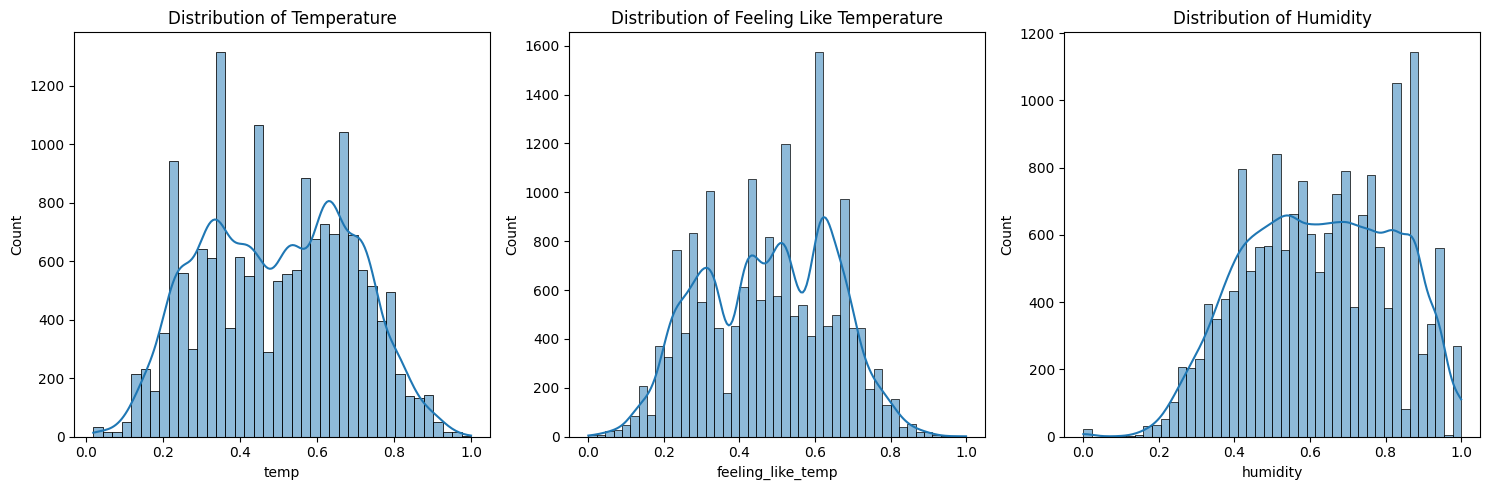

In [24]:


# Distribution of numerical columns
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['temp'], kde=True)
plt.title('Distribution of Temperature')

plt.subplot(1, 3, 2)
sns.histplot(df['feeling_like_temp'], kde=True)
plt.title('Distribution of Feeling Like Temperature')

plt.subplot(1, 3, 3)
sns.histplot(df['humidity'], kde=True)
plt.title('Distribution of Humidity')

plt.tight_layout()
plt.show()


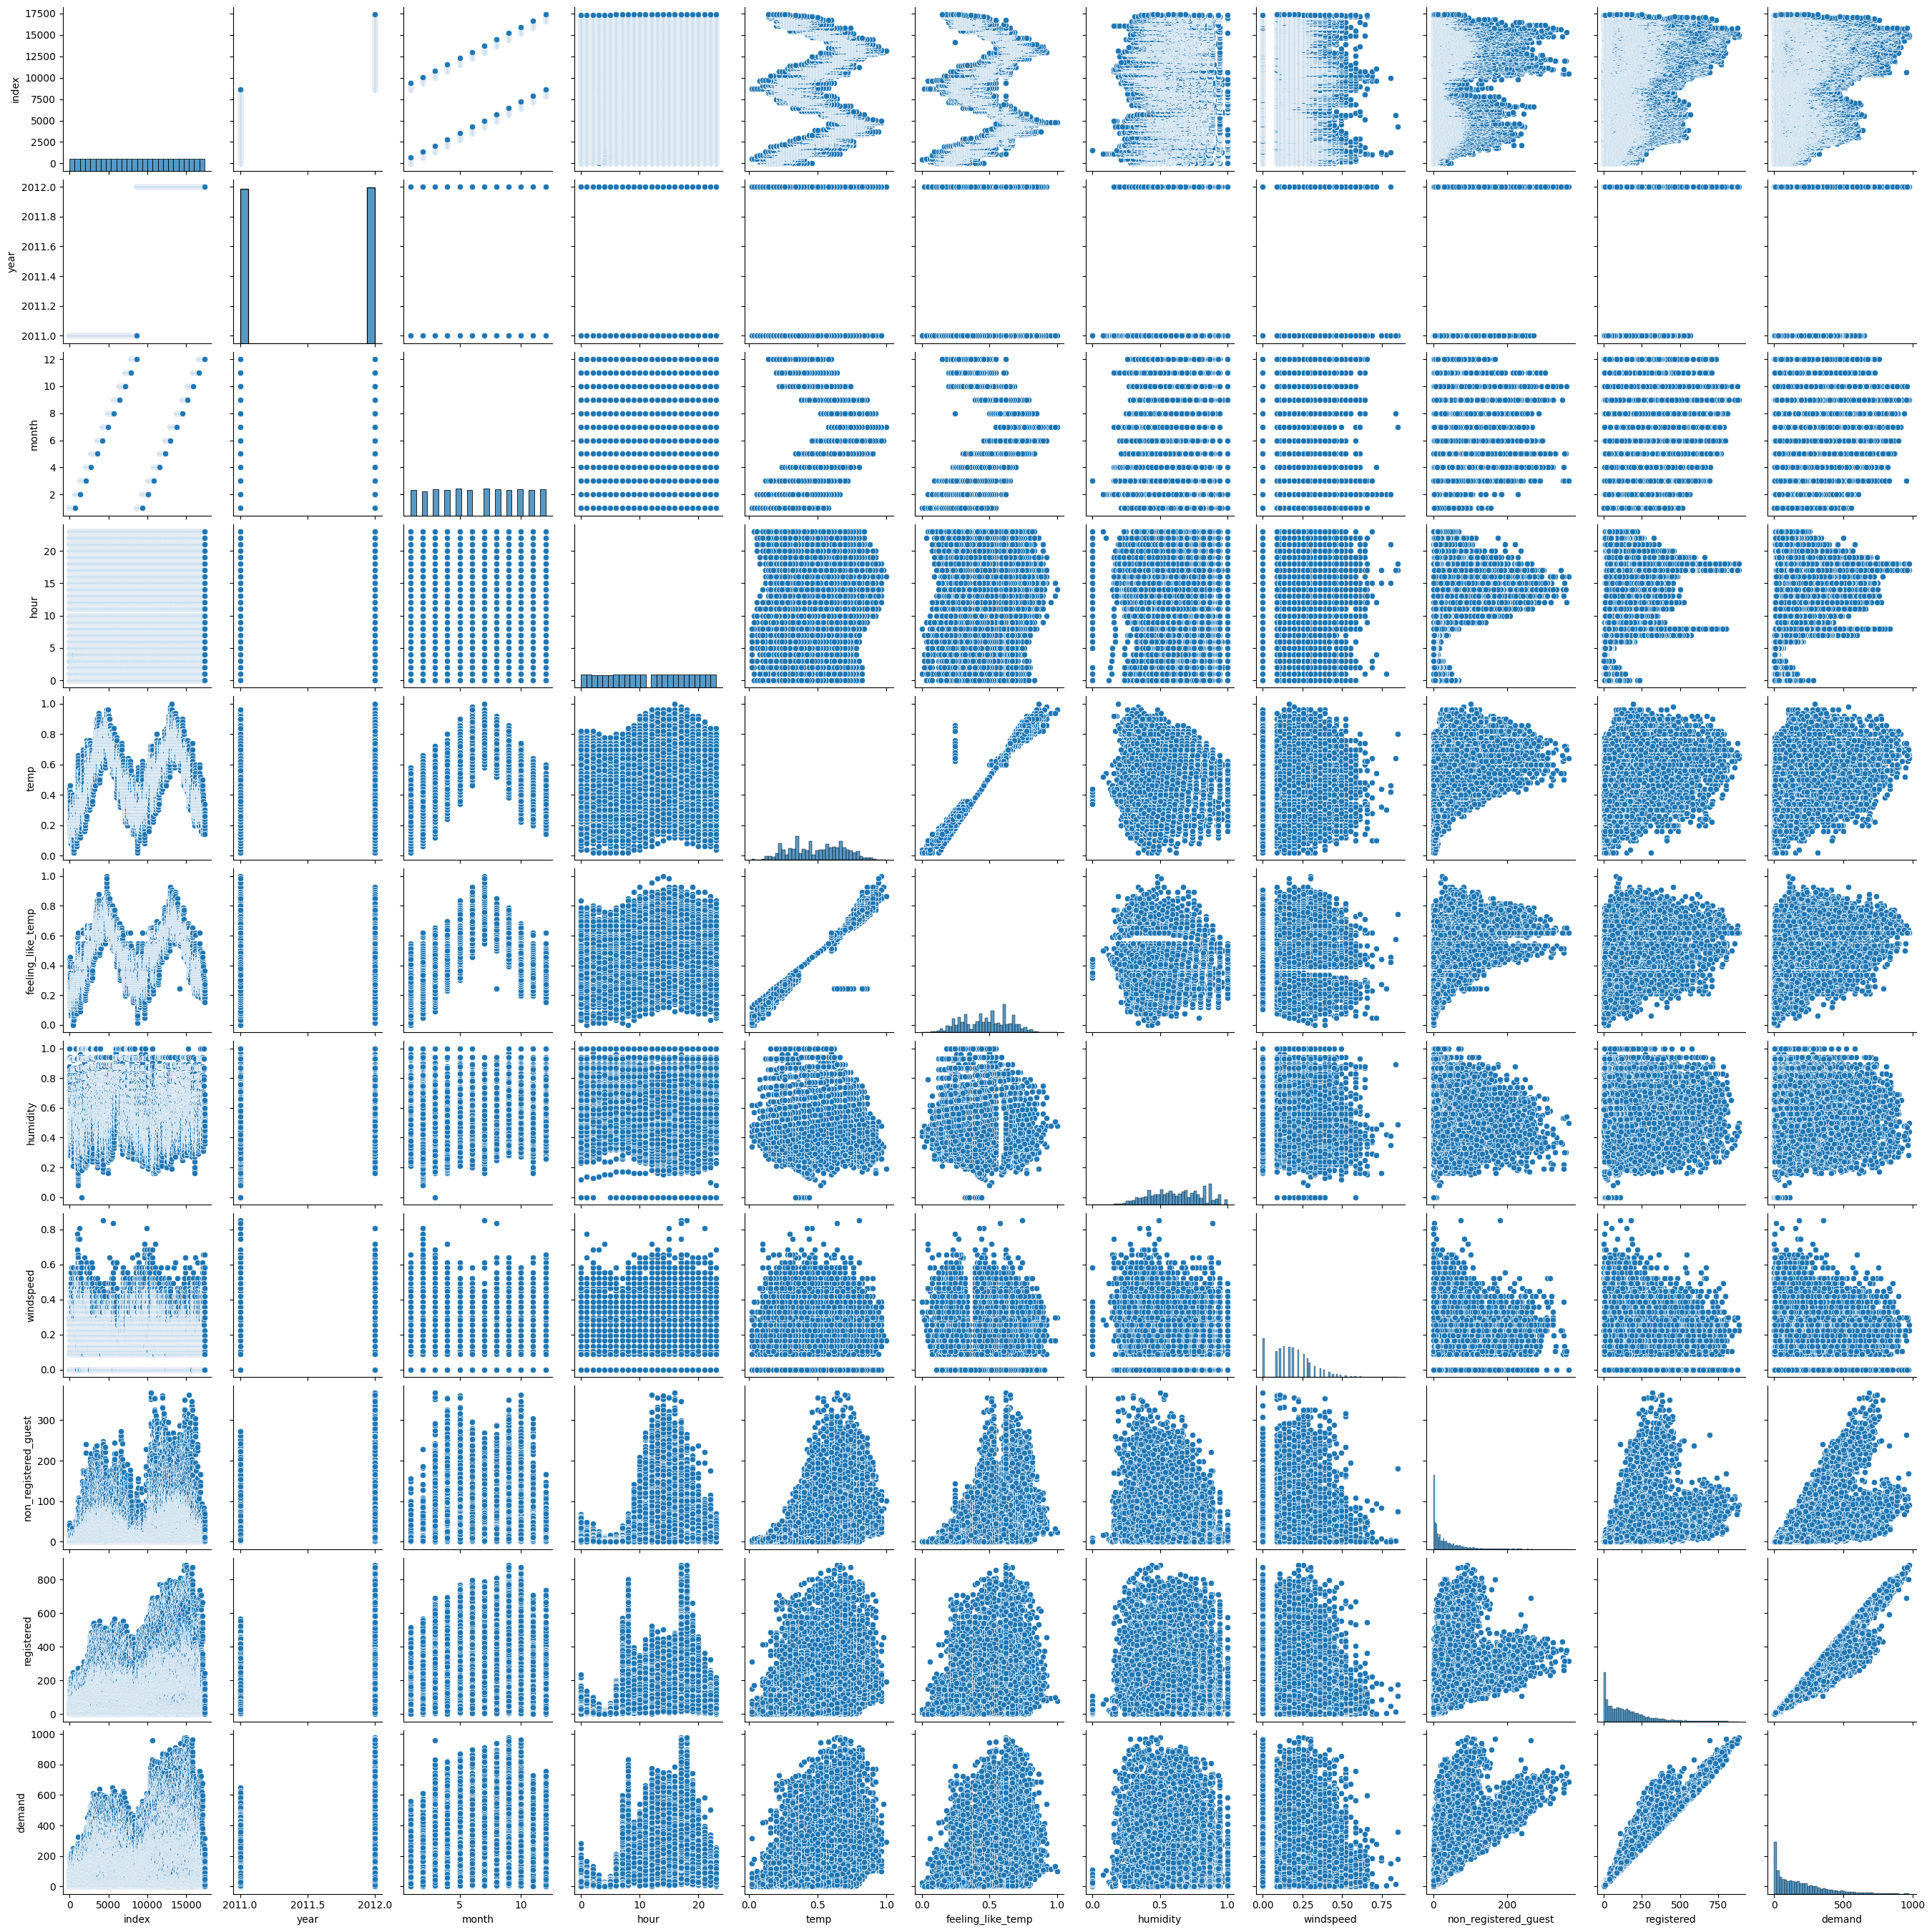

In [21]:


# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Create a pairplot for numerical columns
sns.pairplot(df[numerical_cols])
plt.show()


****

**bivariate analysis**

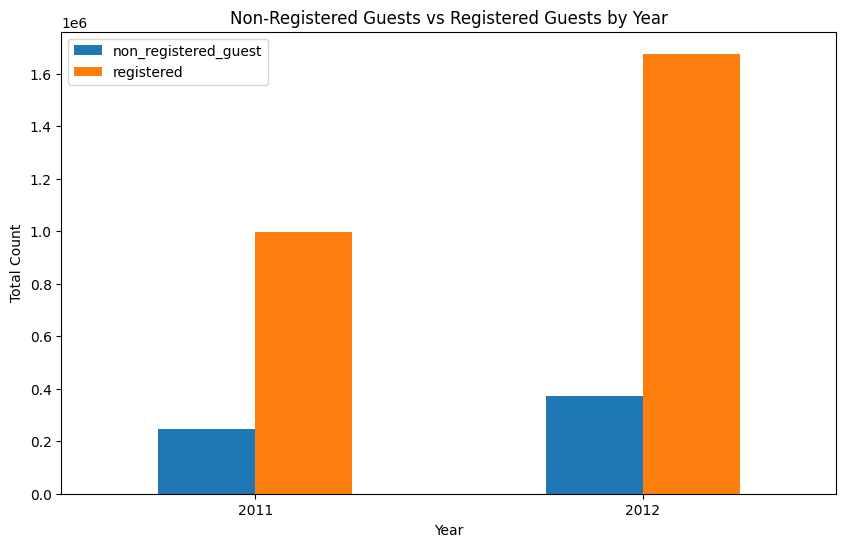

In [28]:


# Group data by 'year' and calculate the total count of 'non_registered_guest' and 'registered' for each year
year_counts = df.groupby('year')[['non_registered_guest', 'registered']].sum()

# Create a bar chart
year_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Non-Registered Guests vs Registered Guests by Year')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.xticks(rotation=0)
plt.legend()
plt.show()


**Insights**

The number of registered guests is significantly higher than non-registered guests in both 2011 and 2012.

Additionally, there is a noticeable increase in the count of registered guests from 2011 to 2012, while the count of non-registered guests remains relatively stable. This suggests a growing trend in the number of registered guests over the years.

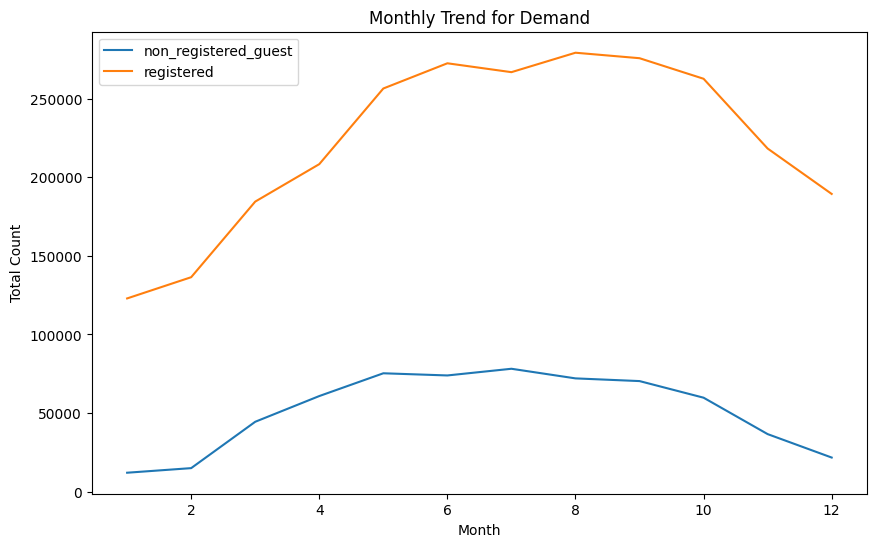

In [57]:
# prompt: chart to show monthy trend for demand

# Extract month from the 'date' column
df['month'] = df['date'].dt.month

# Group data by month and calculate the total count of 'non_registered_guest' and 'registered' for each month
monthly_counts = df.groupby('month')[['non_registered_guest', 'registered']].sum()

# Create a line chart
monthly_counts.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Trend for Demand')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.xticks(rotation=0)
plt.legend()
plt.show()


**Insights**

The line chart shows a consistent monthly trend where both registered and non-registered guest counts increase steadily from January, peaking around mid-year (July-August), and then gradually declining towards the end of the year.

Registered guests consistently have a much higher count than non-registered guests throughout the year, indicating stronger demand from registered users.

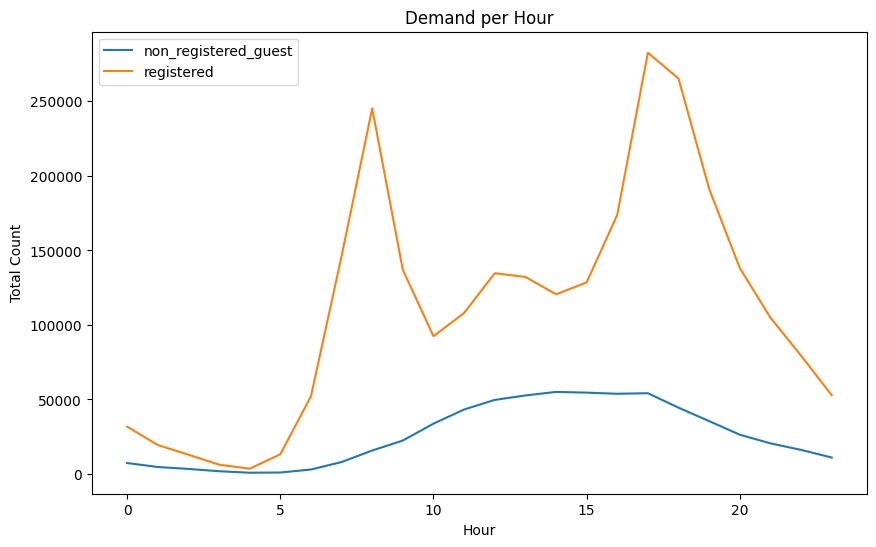

In [81]:
# prompt: chart demand per hour

# Group data by 'hr' and calculate the total count of 'non_registered_guest' and 'registered' for each hour
hourly_counts = df.groupby('hour')[['non_registered_guest', 'registered']].sum()

# Create a line chart
hourly_counts.plot(kind='line', figsize=(10, 6))
plt.title('Demand per Hour')
plt.xlabel('Hour')
plt.ylabel('Total Count')
plt.xticks(rotation=0)
plt.legend()
plt.show()


**Insights**

Registered Guests:

There is a sharp increase in demand starting early morning (around 6 AM), peaking significantly at around 8-9 AM. Demand then decreases, followed by another peak in the late afternoon (around 5-6 PM), before steadily declining through the evening and night.

Non-Registered Guests:

 Demand gradually rises throughout the morning, reaching a moderate peak around noon (12 PM to 1 PM). After this, the demand remains relatively steady through the afternoon and starts to decrease slowly into the evening

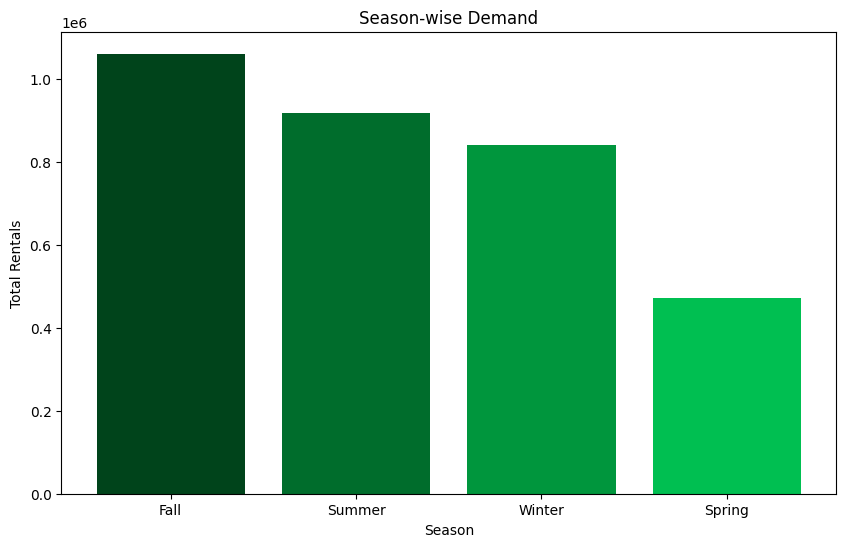

In [44]:

# Calculate the total count of rentals for each season
season_demand = df.groupby('season')['demand'].sum().sort_values(ascending=False)

# Create a list of colors with varying intensity based on demand
colors = ['#00441b', '#006d2c', '#00963d', '#00bf51']  # Darker green for higher demand

# Create the bar chart with gradient colors
plt.figure(figsize=(10, 6))
plt.bar(season_demand.index, season_demand.values, color=colors)
plt.title('Season-wise Demand')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.show()


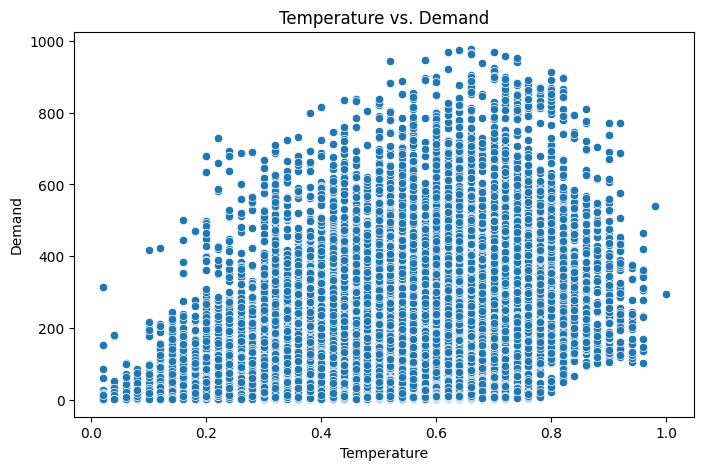

In [46]:
# Scatter plot for temperature vs. demand
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='demand', data=df)
plt.title('Temperature vs. Demand')
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.show()

**Insights**

There is a positive relationship between temperature and demand up to a certain point. As the temperature increases from 0.0 to around 0.6, the demand generally rises, suggesting that warmer temperatures may increase demand.

However, beyond a temperature value of about 0.8, the demand begins to level off and even slightly decline, indicating a possible optimal temperature range for peak demand, after which demand may decrease as temperatures continue to rise.

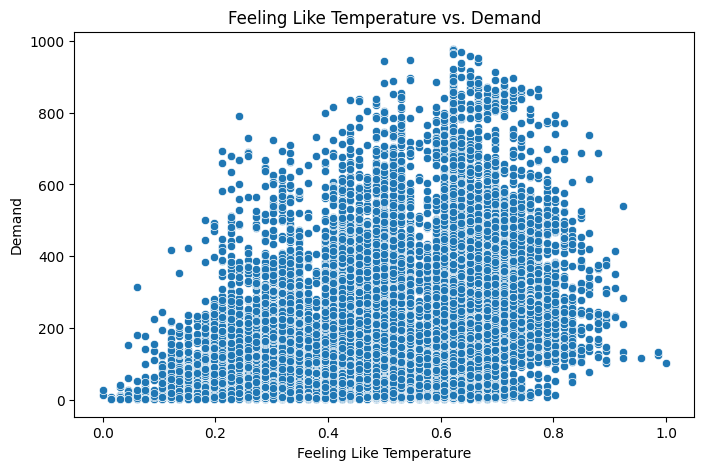

In [47]:
# Scatter plot for feeling like temperature vs. demand
plt.figure(figsize=(8, 5))
sns.scatterplot(x='feeling_like_temp', y='demand', data=df)
plt.title('Feeling Like Temperature vs. Demand')
plt.xlabel('Feeling Like Temperature')
plt.ylabel('Demand')
plt.show()

**Insights**

imilar trend to the previous one: demand generally increases as the "feeling like" temperature rises from 0.0 to around .06.  Beyond this point, the demand appears to plateau and then slightly decrease.

The distribution also indicates that demand tends to drop off as the "feeling like" temperature becomes too low or too high.


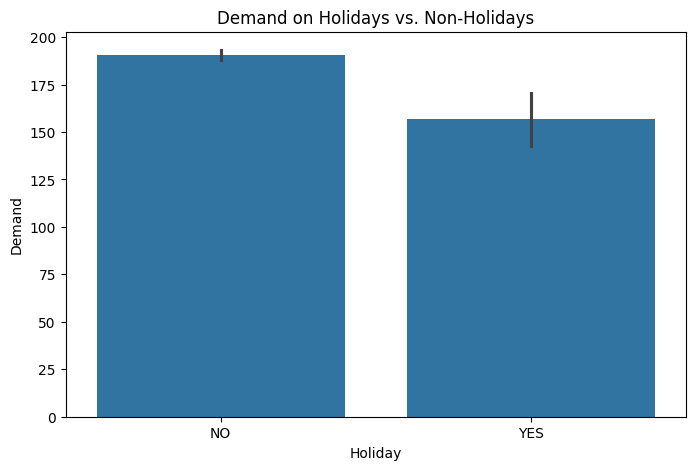

In [48]:
# Bar plot for holiday vs. demand
plt.figure(figsize=(8, 5))
sns.barplot(x='holiday', y='demand', data=df)
plt.title('Demand on Holidays vs. Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Demand')
plt.show()

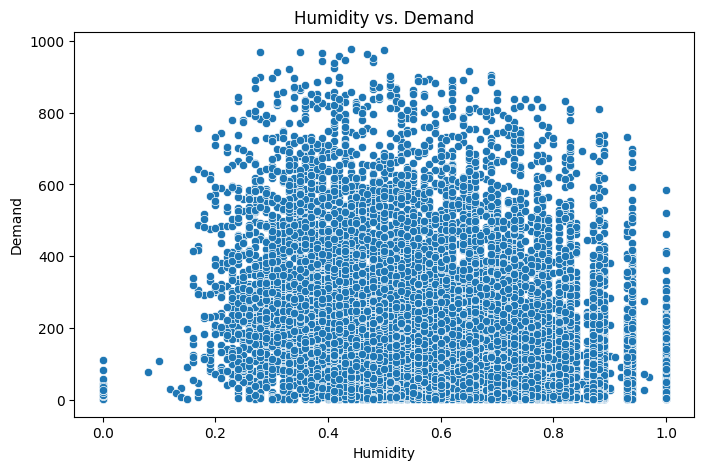

In [50]:
# Scatter plot for humidity vs. demand
plt.figure(figsize=(8, 5))
sns.scatterplot(x='humidity', y='demand', data=df)
plt.title('Humidity vs. Demand')
plt.xlabel('Humidity')
plt.ylabel('Demand')
plt.show()

**Insights**

While demand appears to be spread across all humidity levels, there is a slight concentration of higher demand values when humidity is between 0.2 and 0.6.

Demand seems to decrease slightly as humidity moves towards the extremes (close to 0.0 or 1.0), suggesting that moderate humidity levels might be more favorable for demand, while very low or very high humidity might have a negative impact.

<ipython-input-52-6b772e1820f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='demand', data=workingday_demand, palette="viridis")


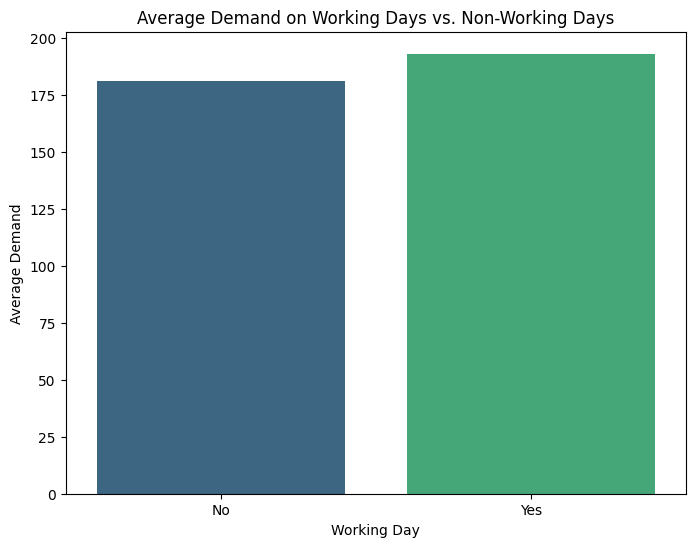

In [52]:
# prompt: workday and demand using leiner graident barchart

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average demand for each workingday category
workingday_demand = df.groupby('workingday')['demand'].mean().reset_index()

# Create the line gradient bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='workingday', y='demand', data=workingday_demand, palette="viridis")
plt.title('Average Demand on Working Days vs. Non-Working Days')
plt.xlabel('Working Day')
plt.ylabel('Average Demand')
plt.show()


<ipython-input-54-eef6c1d3acbd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='demand', data=weekday_demand, palette="viridis")


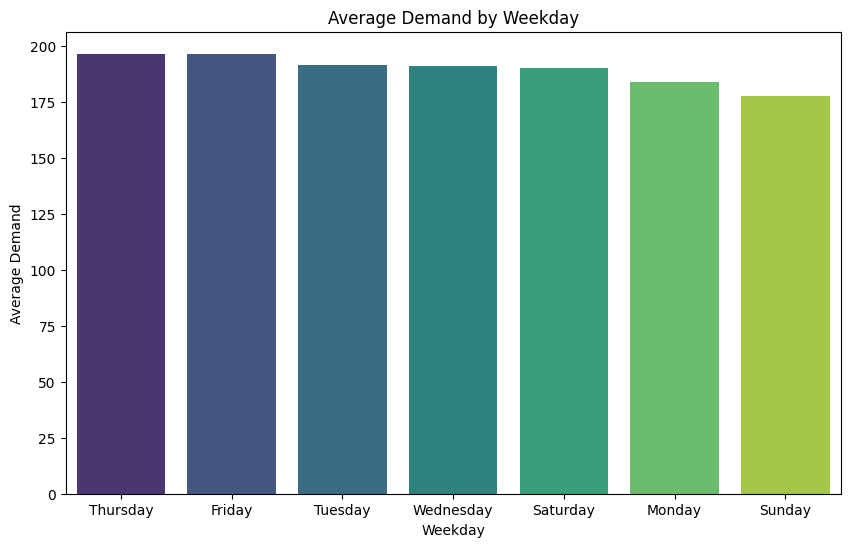

In [54]:
# prompt: weekday for demand using leniar gradent update to order by demand descending

# Calculate the average demand for each weekday
weekday_demand = df.groupby('weekday')['demand'].mean().sort_values(ascending=False).reset_index()

# Create the line gradient bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='demand', data=weekday_demand, palette="viridis")
plt.title('Average Demand by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Demand')
plt.show()


**Feature Engineering**

In [64]:
# prompt: i want convert weather column values back to numbers based off weather severaity.  1: clear and so on

# Create a dictionary to map the weather values back to numbers
weather_mapping_reverse = {'Clear, few clouds': 1,
                           'Mist & Cloudy': 2,
                           'Light Snow, Light Rain & Thunderstorms': 3,
                           'Heavy Rain, Heavy thunderstorms': 4}

# Use the map function to replace the values in the 'weather' column
df['weather'] = df['weather'].map(weather_mapping_reverse)


In [66]:

# Create a dictionary to map the year values
year_mapping = {2011: 0, 2012: 1}

# Use the map function to replace the values in the 'year' column
df['year'] = df['year'].map(year_mapping)


In [68]:
#drop date
df.drop('date', axis=1, inplace=True)

In [69]:
# drop index
df.drop('index', axis=1, inplace=True)

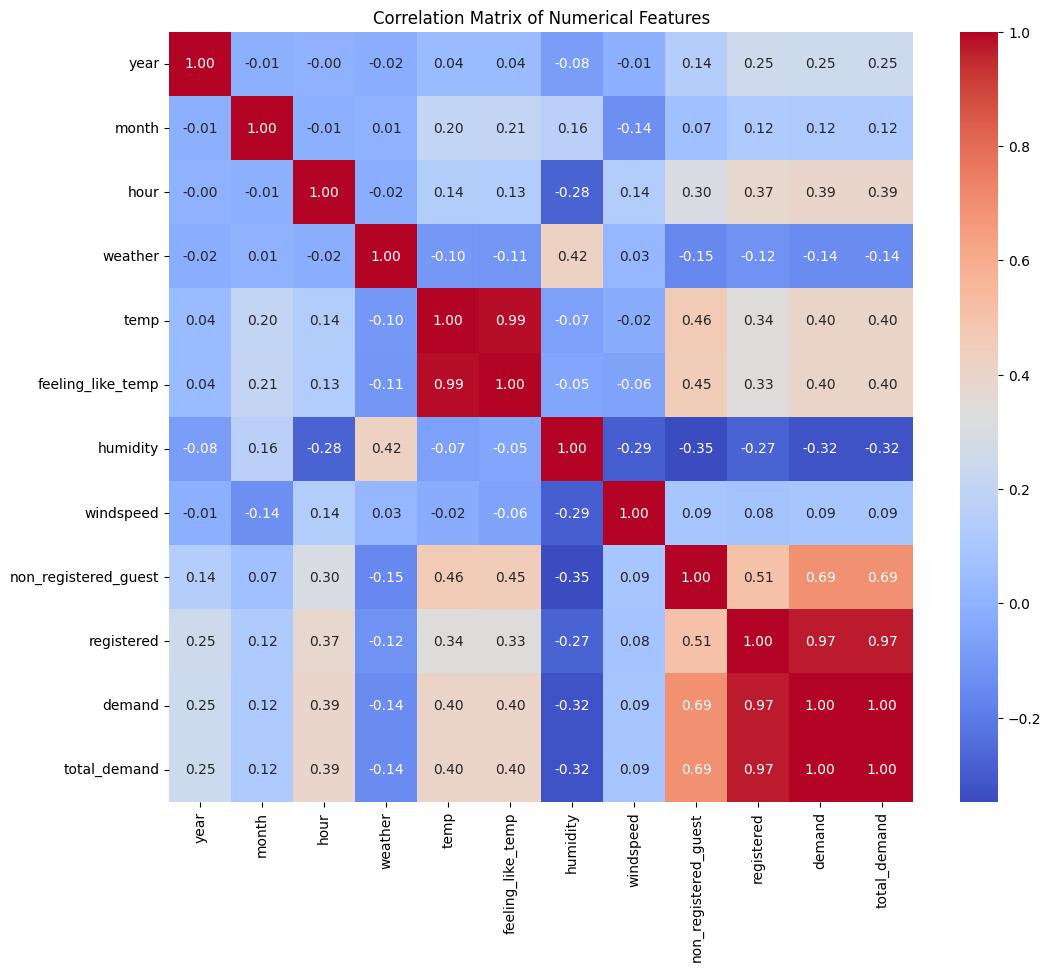

In [70]:
# prompt: corrlation matrix for numerical values

# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [72]:
# drop feeling like temp because of multicolinearity
df.drop('feeling_like_temp', axis=1, inplace=True)





In [73]:
#d rop total demand

df.drop('total_demand', axis=1, inplace=True)

In [74]:
df.head()

season  year  month  hour holiday   weekday workingday  weather  temp  \
0  Spring     0      1     0      NO  Saturday         No        1  0.24   
1  Spring     0      1     1      NO  Saturday         No        1  0.22   
2  Spring     0      1     2      NO  Saturday         No        1  0.22   
3  Spring     0      1     3      NO  Saturday         No        1  0.24   
4  Spring     0      1     4      NO  Saturday         No        1  0.24   

   humidity  windspeed  non_registered_guest  registered  demand  
0      0.81        0.0                     3          13      16  
1      0.80        0.0                     8          32      40  
2      0.80        0.0                     5          27      32  
3      0.75        0.0                     3          10      13  
4      0.75        0.0                     0           1       1

In [75]:


# Create a dictionary to map the workingday values
workingday_mapping = {'No': 0, 'Yes': 1}

# Use the map function to replace the values in the 'workingday' column
df['workingday'] = df['workingday'].map(workingday_mapping)


In [76]:

# Create a dictionary to map the holiday values
holiday_mapping = {'NO': 0, 'YES': 1}

# Use the map function to replace the values in the 'holiday' column
df['holiday'] = df['holiday'].map(holiday_mapping)


In [77]:
df.head()


season  year  month  hour  holiday   weekday  workingday  weather  temp  \
0  Spring     0      1     0        0  Saturday           0        1  0.24   
1  Spring     0      1     1        0  Saturday           0        1  0.22   
2  Spring     0      1     2        0  Saturday           0        1  0.22   
3  Spring     0      1     3        0  Saturday           0        1  0.24   
4  Spring     0      1     4        0  Saturday           0        1  0.24   

   humidity  windspeed  non_registered_guest  registered  demand  
0      0.81        0.0                     3          13      16  
1      0.80        0.0                     8          32      40  
2      0.80        0.0                     5          27      32  
3      0.75        0.0                     3          10      13  
4      0.75        0.0                     0           1       1

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   season                17379 non-null  object 
 1   year                  17379 non-null  int64  
 2   month                 17379 non-null  int32  
 3   hour                  17379 non-null  int64  
 4   holiday               17379 non-null  int64  
 5   workingday            17379 non-null  int64  
 6   weather               17379 non-null  int64  
 7   temp                  17379 non-null  float64
 8   humidity              17379 non-null  float64
 9   windspeed             17379 non-null  float64
 10  non_registered_guest  17379 non-null  int64  
 11  registered            17379 non-null  int64  
 12  demand                17379 non-null  int64  
dtypes: float64(3), int32(1), int64(8), object(1)
memory usage: 1.7+ MB


In [82]:
# drop weekday since its demeand is about even accross days

df.drop('weekday', axis=1, inplace=True)



In [84]:
# drop wordkig day since there is a very small difference

df.drop('workingday', axis=1, inplace=True)

In [85]:


# One-hot encode the 'season' column
df = pd.get_dummies(df, columns=['season'], prefix=['season'])


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [89]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [90]:
import streamlit as st


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  17379 non-null  int64  
 1   month                 17379 non-null  int32  
 2   hour                  17379 non-null  int64  
 3   holiday               17379 non-null  int64  
 4   weather               17379 non-null  int64  
 5   temp                  17379 non-null  float64
 6   humidity              17379 non-null  float64
 7   windspeed             17379 non-null  float64
 8   non_registered_guest  17379 non-null  int64  
 9   registered            17379 non-null  int64  
 10  demand                17379 non-null  int64  
 11  season_Fall           17379 non-null  bool   
 12  season_Spring         17379 non-null  bool   
 13  season_Summer         17379 non-null  bool   
 14  season_Winter         17379 non-null  bool   
dtypes: bool(4), float64

In [95]:
x = df.drop('demand', axis=1)
y = df['demand']

In [97]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [99]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [101]:
# Predict on test data
y_pred = model.predict(x_test)


In [102]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [103]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3.994346847251311e-26
R-squared: 1.0


**Insights**

Mean Squared Error (MSE): The MSE is extremely low, which suggests that the model's predictions are very close to the actual demand values.

R-squared (R²): An R-squared value of 1.0 indicates a perfect fit, meaning the model explains all the variability in the target variable (demand).